## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import sem
from scipy.stats import linregress


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata,study_results,on="Mouse ID", how="left")

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
len(combined_df['Mouse ID'])

1893

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateRows_DF = combined_df[combined_df.duplicated()]
duplicateRows_DF['Mouse ID']

909    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateRows_DF = combined_df[combined_df.duplicated()]
duplicateRows_DF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.0,0


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_combined_df = combined_df.drop_duplicates(keep='first',inplace=False)

In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_combined_df['Mouse ID'])

1892

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_group = clean_combined_df.groupby('Drug Regimen')
mean_drugs = drug_regimen_group['Tumor Volume (mm3)'].mean()

drug_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

# All data for each drug regimen
d1 = clean_combined_df[clean_combined_df['Drug Regimen'].str.contains("Capomulin")]
d2 = clean_combined_df[clean_combined_df['Drug Regimen'].str.contains("Ceftamin")]
d3 = clean_combined_df[clean_combined_df['Drug Regimen'].str.contains("Infubinol")]
d4 = clean_combined_df[clean_combined_df['Drug Regimen'].str.contains("Ketapril")]
d5 = clean_combined_df[clean_combined_df['Drug Regimen'].str.contains("Naftisol")]
d6 = clean_combined_df[clean_combined_df['Drug Regimen'].str.contains("Placebo")]
d7 = clean_combined_df[clean_combined_df['Drug Regimen'].str.contains("Propriva")]
d8 = clean_combined_df[clean_combined_df['Drug Regimen'].str.contains("Ramicane")]
d9 = clean_combined_df[clean_combined_df['Drug Regimen'].str.contains("Stelasyn")]
d10 = clean_combined_df[clean_combined_df['Drug Regimen'].str.contains("Zoniferol")]

# All tumor volumes for each drug regimen
d1_vol = d1['Tumor Volume (mm3)']
d2_vol = d2['Tumor Volume (mm3)']
d3_vol = d3['Tumor Volume (mm3)']
d4_vol = d4['Tumor Volume (mm3)']
d5_vol = d5['Tumor Volume (mm3)']
d6_vol = d6['Tumor Volume (mm3)']
d7_vol = d7['Tumor Volume (mm3)']
d8_vol = d8['Tumor Volume (mm3)']
d9_vol = d9['Tumor Volume (mm3)']
d10_vol = d10['Tumor Volume (mm3)']

# All mean tumor volumes for each drug regimen
mean_d1_vol = np.mean(d1_vol)
mean_d2_vol = np.mean(d2_vol)
mean_d3_vol = np.mean(d3_vol)
mean_d4_vol = np.mean(d4_vol)
mean_d5_vol = np.mean(d5_vol)
mean_d6_vol = np.mean(d6_vol)
mean_d7_vol = np.mean(d7_vol)
mean_d8_vol = np.mean(d8_vol)
mean_d9_vol = np.mean(d9_vol)
mean_d10_vol = np.mean(d10_vol)

# All median tumor volumes for each drug regimen
median_d1_vol = np.median(d1_vol)
median_d2_vol = np.median(d2_vol)
median_d3_vol = np.median(d3_vol)
median_d4_vol = np.median(d4_vol)
median_d5_vol = np.median(d5_vol)
median_d6_vol = np.median(d6_vol)
median_d7_vol = np.median(d7_vol)
median_d8_vol = np.median(d8_vol)
median_d9_vol = np.median(d9_vol)
median_d10_vol = np.median(d10_vol)

# All mode tumor volumes for each drug regimen
mode_d1_vol = st.mode(d1_vol)
mode_d2_vol = st.mode(d2_vol)
mode_d3_vol = st.mode(d3_vol)
mode_d4_vol = st.mode(d4_vol)
mode_d5_vol = st.mode(d5_vol)
mode_d6_vol = st.mode(d6_vol)
mode_d7_vol = st.mode(d7_vol)
mode_d8_vol = st.mode(d8_vol)
mode_d9_vol = st.mode(d9_vol)
mode_d10_vol = st.mode(d10_vol)

# All variance tumor volumes for each drug regimen
var_d1_vol = np.var(d1_vol,ddof = 0)
var_d2_vol = np.var(d2_vol,ddof = 0)
var_d3_vol = np.var(d3_vol,ddof = 0)
var_d4_vol = np.var(d4_vol,ddof = 0)
var_d5_vol = np.var(d5_vol,ddof = 0)
var_d6_vol = np.var(d6_vol,ddof = 0)
var_d7_vol = np.var(d7_vol,ddof = 0)
var_d8_vol = np.var(d8_vol,ddof = 0)
var_d9_vol = np.var(d9_vol,ddof = 0)
var_d10_vol = np.var(d10_vol,ddof = 0)

# All standard deviations tumor volumes for each drug regimen
std_d1_vol = np.std(d1_vol,ddof = 0)
std_d2_vol = np.std(d2_vol,ddof = 0)
std_d3_vol = np.std(d3_vol,ddof = 0)
std_d4_vol = np.std(d4_vol,ddof = 0)
std_d5_vol = np.std(d5_vol,ddof = 0)
std_d6_vol = np.std(d6_vol,ddof = 0)
std_d7_vol = np.std(d7_vol,ddof = 0)
std_d8_vol = np.std(d8_vol,ddof = 0)
std_d9_vol = np.std(d9_vol,ddof = 0)
std_d10_vol = np.std(d10_vol,ddof = 0)

# All SEM tumor volumes for each drug regimen
sem_d1_vol = sem(d1_vol)
sem_d2_vol = sem(d2_vol)
sem_d3_vol = sem(d3_vol)
sem_d4_vol = sem(d4_vol)
sem_d5_vol = sem(d5_vol)
sem_d6_vol = sem(d6_vol)
sem_d7_vol = sem(d7_vol)
sem_d8_vol = sem(d8_vol)
sem_d9_vol = sem(d9_vol)
sem_d10_vol = sem(d10_vol)


drug_regimen_group['Tumor Volume (mm3)'].mean()
mean_drugs
# This method is the most straighforward, creating multiple series and putting them all together at the end.
summary_statistics = pd.DataFrame({'Drug Regimen': drug_list,
                                   'Mean': [mean_d1_vol, mean_d2_vol, mean_d3_vol, mean_d4_vol, mean_d5_vol, mean_d6_vol, mean_d7_vol, mean_d8_vol, mean_d9_vol, mean_d10_vol],
                                   'Median': [median_d1_vol, median_d2_vol, median_d3_vol, median_d4_vol, median_d5_vol, median_d6_vol, median_d7_vol, median_d8_vol, median_d9_vol, median_d10_vol],
                                   'Mode': [mode_d1_vol, mode_d2_vol, mode_d3_vol, mode_d4_vol, mode_d5_vol, mode_d6_vol, mode_d7_vol, mode_d8_vol, mode_d9_vol, mode_d10_vol],
                                   'Variance': [var_d1_vol, var_d2_vol, var_d3_vol, var_d4_vol, var_d5_vol, var_d6_vol, var_d7_vol, var_d8_vol, var_d9_vol, var_d10_vol],
                                   'Standard Deviation': [std_d1_vol, std_d2_vol, std_d3_vol, std_d4_vol, std_d5_vol, std_d6_vol, std_d7_vol, std_d8_vol, std_d9_vol, std_d10_vol],
                                   'SEM': [sem_d1_vol, sem_d2_vol, sem_d3_vol, sem_d4_vol, sem_d5_vol, sem_d6_vol, sem_d7_vol, sem_d8_vol, sem_d9_vol, sem_d10_vol]})
summary_statistics.style.format({'Mean':'{0:,.2f}','Median':'{0:,.2f}','Variance':'{0:,.2f}','Standard Deviation':'{0:,.2f}'})

,Drug Regimen,Mean,Median,Mode,Variance,Standard Deviation,SEM
0,Capomulin,40.68,41.56,"ModeResult(mode=array([45.]), count=array([25]))",24.84,4.98,0.329346
1,Ceftamin,52.59,51.78,"ModeResult(mode=array([45.]), count=array([25]))",39.07,6.25,0.469821
2,Infubinol,52.88,51.82,"ModeResult(mode=array([45.]), count=array([25]))",42.89,6.55,0.492236
3,Ketapril,55.24,53.70,"ModeResult(mode=array([45.]), count=array([25]))",68.19,8.26,0.603860
4,Naftisol,54.33,52.51,"ModeResult(mode=array([45.]), count=array([25]))",65.82,8.11,0.596466
5,Placebo,54.03,52.29,"ModeResult(mode=array([45.]), count=array([25]))",60.83,7.80,0.581331
6,Propriva,52.37,50.91,"ModeResult(mode=array([45.]), count=array([25]))",42.01,6.48,0.514041
7,Ramicane,40.22,40.67,"ModeResult(mode=array([45.]), count=array([25]))",23.38,4.84,0.320955
8,Stelasyn,54.23,52.43,"ModeResult(mode=array([45.]), count=array([24]))",59.12,7.69,0.573111
9,Zoniferol,53.24,51.82,"ModeResult(mode=array([45.]), count=array([25]))",48.27,6.95,0.516398


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_regimen_group = clean_combined_df.groupby('Drug Regimen')
drug_regimen_group['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', sem]).style.format({'mean':'{0:,.2f}','median':'{0:,.2f}','var':'{0:,.2f}','std':'{0:,.2f}'})


# This method produces everything in a single groupby function


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.329346
Ceftamin,52.59,51.78,39.29,6.27,0.469821
Infubinol,52.88,51.82,43.13,6.57,0.492236
Ketapril,55.24,53.70,68.55,8.28,0.603860
Naftisol,54.33,52.51,66.17,8.13,0.596466
Placebo,54.03,52.29,61.17,7.82,0.581331
Propriva,52.37,50.91,42.28,6.50,0.514041
Ramicane,40.22,40.67,23.49,4.85,0.320955
Stelasyn,54.23,52.43,59.45,7.71,0.573111


## Bar and Pie Charts

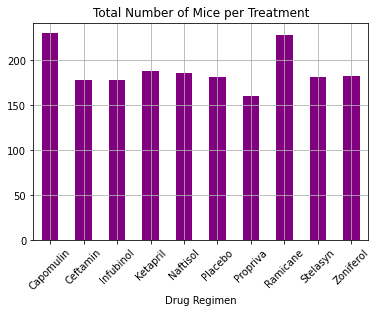

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
drug_regimen_group = clean_combined_df.groupby('Drug Regimen')
count = drug_regimen_group['Mouse ID'].count()
count.plot(kind = 'bar', rot = 45, color = 'purple', grid = 'on', title = 'Total Number of Mice per Treatment')

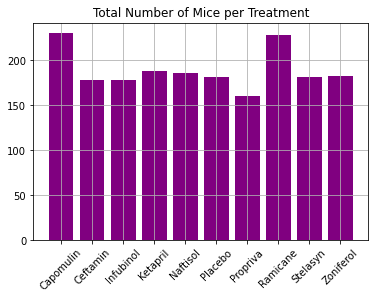

In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.bar(drug_list,count, color = 'purple')
plt.title('Total Number of Mice per Treatment')
plt.xticks(rotation = 45)
plt.grid('on')

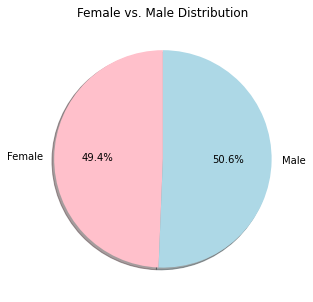

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
male_female = clean_combined_df.groupby('Sex')
count_mf = male_female['Mouse ID'].count()

count_mf.plot(kind = 'pie',startangle=90, title = 'Female vs. Male Distribution',
              autopct="%1.1f%%", colors = ["pink","lightblue"], shadow=True, label = " ",
             figsize=(5,5))


(-1.1053883987155488,
 1.1028246547483551,
 -1.1047298923432014,
 1.1002252329687239)

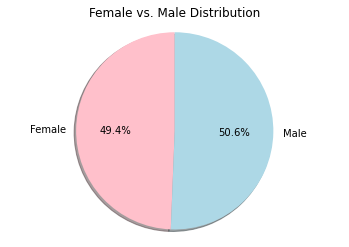

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
colors = ["pink","lightblue"]
explode = (0,0)

plt.pie(count_mf, explode=explode, labels= ['Female','Male'], colors=colors, autopct="%1.1f%%", shadow=True, startangle=90)
plt.title('Female vs. Male Distribution')
plt.axis("equal")


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_final_tumor_vol = clean_combined_df.drop_duplicates(subset = 'Mouse ID',keep='last',inplace=False)

# capomulin_vol_final = mouse_final_tumor_vol.loc[mouse_final_tumor_vol['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
# ramicane_vol_final = mouse_final_tumor_vol.loc[mouse_final_tumor_vol['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
# infubinol_vol_final = mouse_final_tumor_vol.loc[mouse_final_tumor_vol['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
# ceftamin_vol_final = mouse_final_tumor_vol.loc[mouse_final_tumor_vol['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']

clean_combined_df_with_final_vol = clean_combined_df
clean_combined_df_with_final_vol['Final Tumor Volume (mm3)'] = mouse_final_tumor_vol['Tumor Volume (mm3)']
clean_combined_df_with_final_vol = clean_combined_df_with_final_vol.fillna('--')
clean_combined_df_with_final_vol.head(50)
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_final_tumor_vol['Final Tumor Volume (mm3)'] = mouse_final_tumor_vol['Tumor Volume (mm3)']
mouse_final_tumor_vol

<ipython-input-13-1ac4c9950481>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_combined_df_with_final_vol['Final Tumor Volume (mm3)'] = mouse_final_tumor_vol['Tumor Volume (mm3)']
<ipython-input-13-1ac4c9950481>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mouse_final_tumor_vol['Final Tumor Volume (mm3)'] = mouse_final_tumor_vol['Tumor Volume (mm3)']


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Final Tumor Volume (mm3)
9,k403,Ramicane,Male,21,16,45,22.050126,1,22.050126
19,s185,Capomulin,Female,3,17,45,23.343598,1,23.343598
29,x401,Capomulin,Female,16,15,45,28.484033,0,28.484033
39,m601,Capomulin,Male,22,17,45,28.430964,1,28.430964
49,g791,Ramicane,Male,11,16,45,29.128472,1,29.128472
...,...,...,...,...,...,...,...,...,...
1859,z314,Stelasyn,Female,21,28,5,45.934712,0,45.934712
1862,z435,Propriva,Female,12,26,10,48.710661,0,48.710661
1872,z581,Infubinol,Female,24,25,45,62.754451,3,62.754451
1882,z795,Naftisol,Female,13,29,45,65.741070,3,65.741070


In [14]:
clean_combined_df = clean_combined_df.drop(columns = 'Final Tumor Volume (mm3)')

In [15]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_vols_final = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Capomulin', 'Tumor Volume (mm3)']
ramicane_vols_final = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Ramicane', 'Tumor Volume (mm3)']
infubinol_vols_final = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Infubinol', 'Tumor Volume (mm3)']
ceftamin_vols_final = clean_combined_df.loc[clean_combined_df['Drug Regimen'] == 'Ceftamin', 'Tumor Volume (mm3)']



quartiles = capomulin_vols_final.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

quartiles2 = ramicane_vols_final.quantile([.25,.5,.75])
lowerq2 = quartiles2[0.25]
upperq2 = quartiles2[0.75]
iqr2 = upperq2-lowerq2
lower_bound2 = lowerq2 - (1.5*iqr2)
upper_bound2 = upperq2 + (1.5*iqr2)

quartiles3 = infubinol_vols_final.quantile([.25,.5,.75])
lowerq3 = quartiles3[0.25]
upperq3 = quartiles3[0.75]
iqr3 = upperq3-lowerq3
lower_bound3 = lowerq3 - (1.5*iqr3)
upper_bound3 = upperq3 + (1.5*iqr3)

quartiles4 = ceftamin_vols_final.quantile([.25,.5,.75])
lowerq4 = quartiles4[0.25]
upperq4 = quartiles4[0.75]
iqr4 = upperq4-lowerq4
lower_bound4 = lowerq4 - (1.5*iqr4)
upper_bound4 = upperq4 + (1.5*iqr4)





print('--------------------------------------------------------------\nCapomulin\n')
print(f"The lower quartile of the tumor volume for Capomulin is: {round(lowerq,2)}")
print(f"The upper quartile of the tumor volume for Capomulin is: {round(upperq,2)}")
print(f"The interquartile range of the tumor volume for Capomulin is: {round(iqr,2)}")
print(f"Values below {round(lower_bound,2)} could be outliers.")
print(f"Values above {round(upper_bound,2)} could be outliers.\n")

# Determine outliers using upper and lower bounds
cap = clean_combined_df[clean_combined_df['Drug Regimen'].isin(['Capomulin'])]
cap_LO = cap[cap['Tumor Volume (mm3)'] < lower_bound]
cap_UO = cap[cap['Tumor Volume (mm3)'] > upper_bound]
if cap_LO.empty:
    print('There are no lower bound outliers.\n')
else:
    print(f'The lower bound outlier(s):\n\n{cap_LO}\n\n\n')

if cap_UO.empty:
    print('There are no upper bound outliers.\n\n')
else:
    print(f'The upper bound outlier(s):\n\n{cap_UO}\n\n\n\n\n')


    
    
print('--------------------------------------------------------------\nRamicane\n')
print(f"The lower quartile of the tumor volume for Ramicane is: {round(lowerq2,2)}")
print(f"The upper quartile of the tumor volume for Ramicane is: {round(upperq2,2)}")
print(f"The interquartile range of the tumor volume for Ramicane is: {round(iqr2,2)}")
print(f"Values below {round(lower_bound2,2)} could be outliers.")
print(f"Values above {round(upper_bound2,2)} could be outliers.\n")

# Determine outliers using upper and lower bounds
ram = clean_combined_df[clean_combined_df['Drug Regimen'].isin(['Ramicane'])]
ram_LO = ram[ram['Tumor Volume (mm3)'] < lower_bound2]
ram_UO = ram[ram['Tumor Volume (mm3)'] > upper_bound2]
if ram_LO.empty:
    print('There are no lower bound outliers.\n')
else:
    print(f'The lower bound outlier(s):\n\n{ram_LO}\n\n\n')

if ram_UO.empty:
    print('There are no upper bound outliers.\n\n')
else:
    print(f'The upper bound outlier(s):(s):\n\n{ram_UO}\n\n\n\n\n')




print('--------------------------------------------------------------\nInfubinol\n')
print(f"The lower quartile of the tumor volume for Infubinol is: {round(lowerq3,2)}")
print(f"The upper quartile of the tumor volume for Infubinol is: {round(upperq3,2)}")
print(f"The interquartile range of the tumor volume for Infubinol is: {round(iqr3,2)}")
print(f"Values below {round(lower_bound3,2)} could be outliers.")
print(f"Values above {round(upper_bound3,2)} could be outliers.\n")

# Determine outliers using upper and lower bounds
inf = clean_combined_df[clean_combined_df['Drug Regimen'].isin(['Infubinol'])]
inf_LO = inf[inf['Tumor Volume (mm3)'] < lower_bound3]
inf_UO = inf[inf['Tumor Volume (mm3)'] > upper_bound3]
if inf_LO.empty:
    print('There are no lower bound outliers.\n')
else:
    print(f'The lower bound outlier(s):\n\n{inf_LO}\n\n\n')

if inf_UO.empty:
    print('There are no upper bound outliers.\n\n')
else:
    print(f'The upper bound outlier(s):\n\n{inf_UO}\n\n\n\n\n')




print('--------------------------------------------------------------\nCeftamin\n')
print(f"The lower quartile of the tumor volume for Ceftamin is: {round(lowerq4,2)}")
print(f"The upper quartile of the tumor volume for Ceftamin is: {round(upperq4,2)}")
print(f"The interquartile range of the tumor volume for Ceftamin is: {round(iqr4,2)}")
print(f"Values below {round(lower_bound4,2)} could be outliers.")
print(f"Values above {round(upper_bound4,2)} could be outliers.\n")

# Determine outliers using upper and lower bounds
cef = clean_combined_df[clean_combined_df['Drug Regimen'].isin(['Ceftamin'])]
cef_LO = cef[cef['Tumor Volume (mm3)'] < lower_bound4]
cef_UO = cef[cef['Tumor Volume (mm3)'] > upper_bound4]
if cef_LO.empty:
    print('There are no lower bound outliers.\n')
else:
    print(f'The lower bound outlier(s):\n\n{cef_LO}\n\n\n')

if cef_UO.empty:
    print('There are no upper bound outliers.\n\n')
else:
    print(f'The upper bound outlier(s):\n\n{cef_UO}\n\n\n\n\n')



--------------------------------------------------------------
Capomulin

The lower quartile of the tumor volume for Capomulin is: 37.69
The upper quartile of the tumor volume for Capomulin is: 45.0
The interquartile range of the tumor volume for Capomulin is: 7.31
Values below 26.71 could be outliers.
Values above 55.97 could be outliers.

The lower bound outlier(s):

   Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
18     s185    Capomulin  Female           3          17         40   
19     s185    Capomulin  Female           3          17         45   

    Tumor Volume (mm3)  Metastatic Sites  
18           25.472143                 1  
19           23.343598                 1  



There are no upper bound outliers.


--------------------------------------------------------------
Ramicane

The lower quartile of the tumor volume for Ramicane is: 36.67
The upper quartile of the tumor volume for Ramicane is: 45.0
The interquartile range of the tumor volume for R

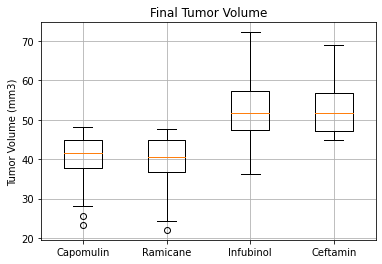

In [16]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
plt.boxplot([capomulin_vols_final, ramicane_vols_final, infubinol_vols_final, ceftamin_vols_final], showfliers = True)
plt.title('Final Tumor Volume')
plt.ylabel('Tumor Volume (mm3)')
plt.xticks([1,2,3,4],['Capomulin','Ramicane','Infubinol','Ceftamin'])
plt.grid()
plt.show()

## Line and Scatter Plots

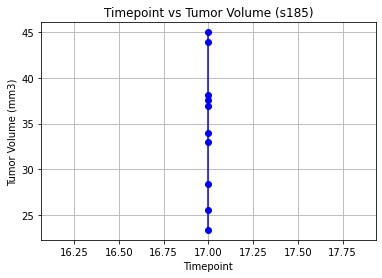

In [17]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulin_time_s185 = clean_combined_df.loc[clean_combined_df['Mouse ID'] == 's185', 'Weight (g)']
capomulin_vol_s185 = clean_combined_df.loc[clean_combined_df['Mouse ID'] == 's185', 'Tumor Volume (mm3)']
plt.plot(capomulin_time_s185,capomulin_vol_s185, marker = 'o', color = 'b')
plt.title('Timepoint vs Tumor Volume (s185)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()

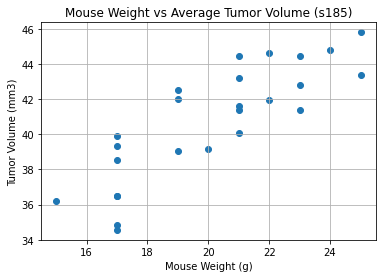

In [18]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# averages_mouse_data = clean_combined_df.groupby('Mouse ID').mean()
averages_mouse_data_cap = cap.groupby('Mouse ID').mean()

all_weight = averages_mouse_data_cap['Weight (g)']
all_tumor_volume = averages_mouse_data_cap['Tumor Volume (mm3)']

plt.scatter(all_weight, all_tumor_volume)
plt.title('Mouse Weight vs Average Tumor Volume (s185)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()


## Correlation and Regression

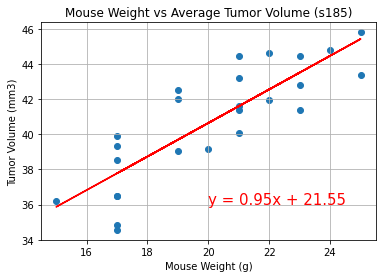

The correlation between both factors is 0.84


In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(all_weight, all_tumor_volume)

x_values = all_weight
y_values = all_tumor_volume
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(all_weight, all_tumor_volume)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq, (20,36), fontsize=15, color="red")
plt.title('Mouse Weight vs Average Tumor Volume (s185)')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()
plt.show()
print(f"The correlation between both factors is {round(correlation[0],2)}")
